# **CinemaScope: Lens on Gender Shifts**

**Content of the Project**


Movies offer viewers the opportunity to share different experiences and emotions. While doing this, films generally focus on the emotions like sorrows and joys, serving as reflections of society. Despite its power and reach, it struggles with a long-standing issue of gender bias. It is believed by some people that there is gender bias in the movie industry. There are many arguments in this gender bias scope, such as stereotypical portrayal of male and female characters and underrepresentation of women.

In this project, it is aimed to perform qualitative and quantitative analysis comprehensively to explore the multifaceted dimensions of gender representation in movies.This study examines whether the representation of female in the movie industry has improved in time to better understand the extent of female under-representation and stereotyping. 

TODO: ADD SOME METHODOLOGY INFO IN

**Load the CMU movie dataset**


In this project, our main dataset is CMU movie dataset which is taken from [CMU movie dataset](https://www.cs.cmu.edu/~ark/personas/)
. All of the data taken from the website is collected under /dataset folder in the project.


In [1]:
import json
import os
import ast  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import ast  

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

In [2]:
#folder_path= "dataset"
folder_path=".\MovieSummaries"
character_metadata_path = os.path.join(folder_path, "character.metadata.tsv")
movie_metadata_path = os.path.join(folder_path, "movie.metadata.tsv")

tvtropes_path = os.path.join(folder_path, 'tvtropes.clusters.txt')
name_clusters_path = os.path.join(folder_path, 'name.clusters.txt')
plot_summary_path = os.path.join(folder_path, 'plot_summaries.txt')


In [3]:
character_df=pd.read_csv(character_metadata_path,sep="\t",names=[
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character name",
    "Actor date of birth",
    "Actor gender",
    "Actor height (in meters)",
    "Actor ethnicity (Freebase ID)",
    "Actor name",
    "Actor age at movie release",
    "Freebase character/actor map ID",
    "Freebase character ID",
    "Freebase actor ID"
])
movie_df=pd.read_csv(movie_metadata_path,sep="\t",names=["Wikipedia movie ID",
                                                                "Freebase movie ID",
                                                                "Movie name",
                                                                "Movie release date",
                                                                "Movie box office revenue",
                                                                "Movie runtime",
                                                                "Movie languages",
                                                                "Movie countries",
                                                                "Movie genres"])


# Read tvtropes.clusters.txt and create a dataframe
tvtropes_data = pd.read_csv(tvtropes_path, sep='\t', header=None)
tvtropes_data.columns = ['Character Type', 'Info']

# Read name.clusters.txt and create a dataframe
name_data = pd.read_csv(name_clusters_path, sep='\t', header=None)
name_data.columns = ['Character Name', 'ID']


# Read plot_summaries.txt and create a dataframe
summary_data = pd.read_csv(plot_summary_path, sep='\t', header=None)
summary_data.columns = ['ID', 'summary']

**Preprocessing the data**

In this section:

*  we have extracted the values in columns which are in dictionary format to seperate columns
*  proper naming for the columns
*  handling missing data

In [4]:
character_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
# we wont use Freebase character/actor map ID, Freebase character ID, Freebase actor ID, so they are dropped
character_df = character_df.drop(['Freebase character ID', 'Freebase actor ID'], axis=1)

In [6]:
character_df['Movie release year'] = character_df['Movie release date'].str[:4]

In [7]:
# convert the json parts into list of values (since we wont use the freebase ids)
def extract_values(str_list):
    return [list(ast.literal_eval(d).values()) if isinstance(d, str) else [] for d in str_list]


# Apply the function to the specific columns
movie_df['Movie languages'] = extract_values(movie_df['Movie languages'])
movie_df['Movie countries'] = extract_values(movie_df['Movie countries'])
movie_df['Movie genres'] = extract_values(movie_df['Movie genres'])


#first 4 characters from each release date - only year
movie_df['Movie release year'] = movie_df['Movie release date'].str[:4]

In [8]:
movie_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],1983


In [9]:
tvtropes_data.head()

,Character Type,Info
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [10]:
# open the values in Info section of tvtropes
tvtropes_data = pd.concat([tvtropes_data['Character Type'], tvtropes_data['Info'].apply(lambda x: pd.Series(json.loads(x)))], axis=1)
tvtropes_data.head()

,Character Type,char,movie,id,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [11]:
name_data.head()

,Character Name,ID
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [12]:
summary_data.head()

,ID,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [13]:
# change the naming for consistency
summary_data = summary_data.rename(columns={'ID': 'Wikipedia movie ID'})

Evaluate the Missing Data

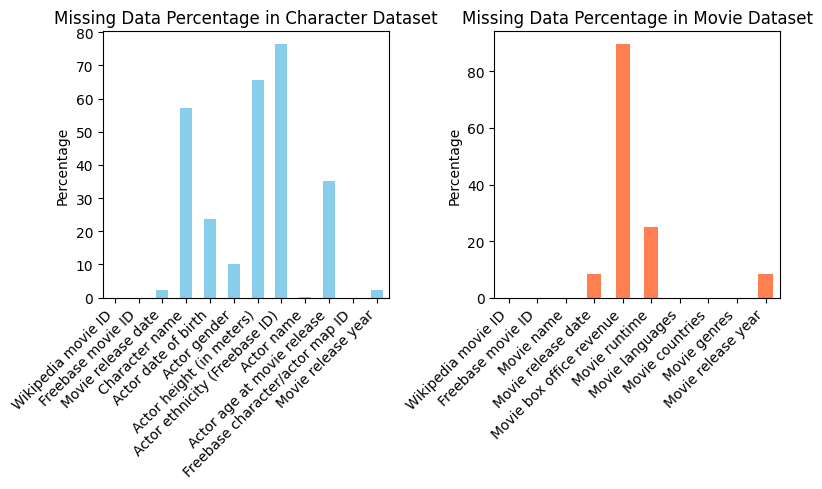

In [14]:
missing_percentage_character_df = (character_df.isnull().sum() / len(character_df)) * 100
missing_percentage_movie_df = (movie_df.isnull().sum() / len(movie_df)) * 100

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)  
missing_percentage_character_df.plot(kind='bar', color='skyblue')
plt.title('Missing Data Percentage in Character Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)  
missing_percentage_movie_df.plot(kind='bar', color='coral')
plt.title('Missing Data Percentage in Movie Dataset')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  
plt.show()


It is clearly observed that there are lots of missing values in box office revenue. For this reason, we decided not to use that feature in our project since it can lead some wrong interpretations.

Decision for the Analysis Time Interval

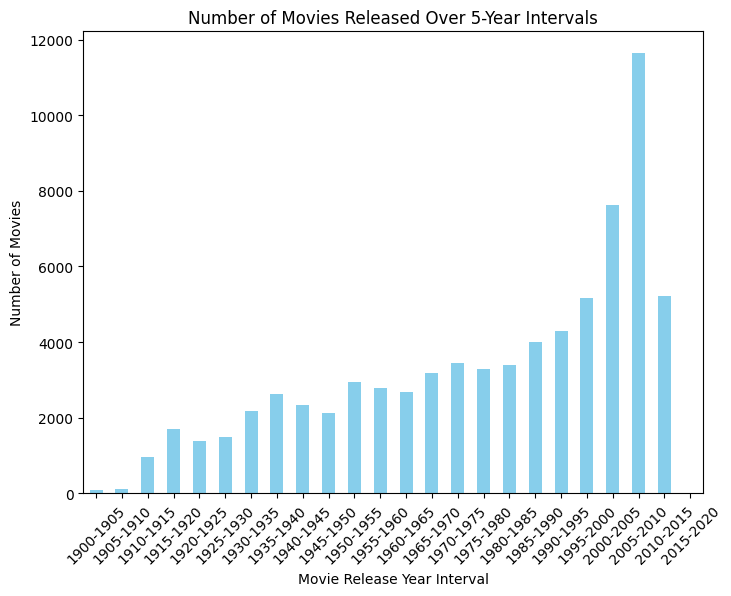

In [15]:
movie_df['Movie release year'] = pd.to_numeric(movie_df['Movie release year'], errors='coerce')
movie_df = movie_df.dropna(subset=['Movie release year'])

movie_df['Movie release year'] = movie_df['Movie release year'].astype(int)
min_year = 1900  # before that there are less number of movies, discarded.
max_year = movie_df['Movie release year'].max()
year_bins = np.arange(min_year, max_year + 5, 5)
year_labels = [f'{int(y)}-{int(y+5)}' for y in year_bins[:-1]]

# Categorize each row into a 20-year interval
movie_df['Year Interval'] = pd.cut(movie_df['Movie release year'], bins=year_bins, labels=year_labels, right=False)
movies_over_intervals = movie_df.groupby('Year Interval').size()

plt.figure(figsize=(8, 6))
movies_over_intervals.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Over 5-Year Intervals')
plt.xlabel('Movie Release Year Interval')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


It is seen that there are movies between 1900 to 2016. However, between 2010 and 2015 it is observed that there is less value in contrast to the increasing trend in time. So, we decided to use the data which we have found more reliable which is 1900 to 2010.

**Additional data generation**

We collected additional data by following the below steps:
* Dataset creation using Freebase IDs and Wikidata API to extract IMDb IDs.
* Utilization of the TMDB API for acquiring gender information of cast and crew members.

The results are stored in movie_with_gender_info.csv file.

**The analysis**
1) Cast & Crew Gender Distribution
2) Gender Diversity and Film Performance
3) Temporal Trends in Gender Representation

In [80]:
TMDB_data_path = "./additional_dataset/movie_with_gender_info.csv"
movie_with_gender_info= pd.read_csv(TMDB_data_path, index_col=0)
movie_with_gender_info.head(2)

,title,cast,crew,cast_gender,crew_gender,combined_genders,all_gender_percentages,cast_gender_percentages,crew_gender_percentages
0,Ghosts of Mars,"[{'adult': False, 'gender': 1, 'id': 57395, 'k...","[{'adult': False, 'gender': 2, 'id': 8340, 'kn...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","[2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, ...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","{1: 38.46153846153847, 2: 47.43589743589743, 0...","{1: 40.74074074074074, 2: 55.55555555555556, 0...","{2: 43.13725490196079, 0: 19.607843137254903, ..."
1,Getting Away with Murder: The JonBenét Ramsey ...,[],"[{'adult': False, 'gender': 0, 'id': 2929954, ...",[],[0],[0],{0: 100.0},{},{0: 100.0}


Additional Dataset from Kaggle

Oscar Awards: 

Analyzing Oscar awards data by gender, focusing on nominee and winner gender proportions, revealing industry gender biases and progress towards equality in film awards.

The data is taken from [Oscar Awards](https://www.kaggle.com/datasets/unanimad/the-oscar-award/data?select=the_oscar_award.csv)

In [17]:
oscars_df=pd.read_csv("./additional_dataset/the_oscar_award.csv")
oscars_df.head(2)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True


Handling Missing Values and Organizing Additional Dataset to Align with Main Dataset

Since the generated data is created by us it obeys the existing films in the main dataset. However, for the oscars dataset we need to match them with the CMU Movie Dataset.

In [18]:
# Eliminate rows in Oscars dataset where film names do not match with movie_df
oscars_df = oscars_df[oscars_df['film'].str.lower().isin(movie_df['Movie name'].str.lower())]
oscars_df.head(2)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True


In [19]:
#handle nan values in character df
character_df= character_df.dropna(subset=['Character name', 'Actor gender', 'Actor age at movie release'])

#handle nan values in oscars
oscars_df = oscars_df.dropna(subset=['category', 'winner'])


Conducting Analysis to Address Research Questions

Our research questions are:

1) How does gender impact actors' career opportunities, collaborations and success, particularly in terms of the types of role and reward opportunities offered? 
2) Do plot summaries contain any gender stereotypes, and if so, in what manner? 
3) Does semantic analysis of character types reveal any distinct differences in the assignment of roles based on gender? 
4) Does the gender composition of cast and crew influence the critical success of films, evaluated by IMDb ratings?
5) Are there specific movie genres that demonstrate a minimal or no gender gap in terms of character representation?

We will provide the charts and analysis results along with our interpretations step by step.

**Analysis for Reward Opportunities based on Gender**

In [20]:
# Merge character_df and movie_df based on Wikipedia movie ID and Freebase movie ID
merged_movie_character = pd.merge(character_df, movie_df, on=['Wikipedia movie ID', 'Freebase movie ID'], how='left')
merged_movie_character.head(2)

,Wikipedia movie ID,Freebase movie ID,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,...,Movie release year_x,Movie name,Movie release date_y,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie release year_y,Year Interval
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,...,2001,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,2000-2005
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,...,2001,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001,2000-2005


In [21]:
oscars_actor_actress = oscars_df[oscars_df['category'].isin(['ACTOR', 'ACTRESS'])]

In [22]:
merged_movie_character['Movie name'] = merged_movie_character['Movie name'].str.lower()
oscars_actor_actress['film'] = oscars_actor_actress['film'].str.lower()

merged_movie_character['Actor name'] = merged_movie_character['Actor name'].str.lower()
oscars_actor_actress['name'] = oscars_actor_actress['name'].str.lower()

# Merge character_df and oscars_df based on the lowercase versions of "Movie name" and "film"
merged_oscars_character = pd.merge(merged_movie_character, oscars_actor_actress, left_on=['Movie name','Actor name'], right_on=['film','name'], how='left')

merged_oscars_character.head(2)

,Wikipedia movie ID,Freebase movie ID,Movie release date_x,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,...,Movie genres,Movie release year_y,Year Interval,year_film,year_ceremony,ceremony,category,name,film,winner
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,wanda de jesus,42.0,...,"[Thriller, Science Fiction, Horror, Adventure,...",2001,2000-2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,natasha henstridge,27.0,...,"[Thriller, Science Fiction, Horror, Adventure,...",2001,2000-2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
merged_oscars_character['Oscar Status'] = 'Not Nominated'  # Initialize with 'Not Nominated'
merged_oscars_character.loc[merged_oscars_character['winner'] == False, 'Oscar Status'] = 'Nominated'
merged_oscars_character.loc[merged_oscars_character['winner'] == True, 'Oscar Status'] = 'Winner'

In [24]:
num_female_not_nominated = (merged_oscars_character[(merged_oscars_character['Actor gender'] == "F") & (merged_oscars_character['Oscar Status'] == 'Not Nominated')]).shape[0]
num_male_not_nominated = (merged_oscars_character[(merged_oscars_character['Actor gender'] == "M") & (merged_oscars_character['Oscar Status'] == 'Not Nominated')]).shape[0]


num_female_nominated = (merged_oscars_character[(merged_oscars_character['Actor gender'] == "F") & (merged_oscars_character['Oscar Status'] == 'Nominated')]).shape[0]
num_male_nominated = (merged_oscars_character[(merged_oscars_character['Actor gender'] == "M") & (merged_oscars_character['Oscar Status'] == 'Nominated')]).shape[0]

num_female_win= (merged_oscars_character[(merged_oscars_character['Actor gender'] == "F") & (merged_oscars_character['Oscar Status'] == 'Winner')]).shape[0]
num_male_win = (merged_oscars_character[(merged_oscars_character['Actor gender'] == "M") & (merged_oscars_character['Oscar Status'] == 'Winner')]).shape[0]


print("Number of females not nominated in our dataset: ",num_female_not_nominated, ",males not nominated: ", num_male_not_nominated )
print("Number of females nominated in our dataset: ",num_female_nominated, ",males nominated: ", num_male_nominated )
print("Number of females win in our dataset: ",num_female_win, ",males win: ", num_male_win )

Number of females not nominated in our dataset:  48374 ,males not nominated:  84692
Number of females nominated in our dataset:  124 ,males nominated:  118
Number of females win in our dataset:  38 ,males win:  33


In [25]:
merged_oscars_character.columns

Index(['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date_x',
       'Character name', 'Actor date of birth', 'Actor gender',
       'Actor height (in meters)', 'Actor ethnicity (Freebase ID)',
       'Actor name', 'Actor age at movie release',
       'Freebase character/actor map ID', 'Movie release year_x', 'Movie name',
       'Movie release date_y', 'Movie box office revenue', 'Movie runtime',
       'Movie languages', 'Movie countries', 'Movie genres',
       'Movie release year_y', 'Year Interval', 'year_film', 'year_ceremony',
       'ceremony', 'category', 'name', 'film', 'winner', 'Oscar Status'],
      dtype='object')

In [26]:
#for the ones that receive the nominee
nominated_merged_oscars_character= merged_oscars_character[merged_oscars_character['Oscar Status'] != 'Not Nominated'] 

unique_actors = nominated_merged_oscars_character["Actor name"].unique()

print("Number of actors that nominated/win Oscars at least once:",unique_actors.shape[0])

Number of actors that nominated/win Oscars at least once: 151


In [27]:
# Step 1: Filter for the first occurrence of each unique Actor name
first_occurrences = nominated_merged_oscars_character.drop_duplicates(subset='Actor name', keep='first')

# Step 2: Extract unique Actor names and their corresponding year_ceremony information
unique_actors_and_years = first_occurrences[['Actor name','Actor gender', 'year_ceremony']]
unique_actors_and_years = unique_actors_and_years.rename(columns={'year_ceremony': 'year_nomination'})

# Display the updated DataFrame
print(unique_actors_and_years)


               Actor name Actor gender  year_nomination
1233     rosalind russell            F           1943.0
1622           art carney            M           1975.0
1927        spencer tracy            M           1956.0
2000       ingrid bergman            F           1957.0
2436     laurence olivier            M           1966.0
...                   ...          ...              ...
121447        grace kelly            F           1955.0
121885  dorothy dandridge            F           1955.0
124465        larry parks            M           1947.0
125130    cliff robertson            M           1969.0
125354      frank sinatra            M           1956.0

[151 rows x 3 columns]


In [28]:
merged_with_year_ceremony = pd.merge(unique_actors_and_years, merged_oscars_character, on='Actor name', how='left')
merged_with_year_ceremony['year_nomination'] = merged_with_year_ceremony['year_nomination'].astype(int)
merged_with_year_ceremony = merged_with_year_ceremony.rename(columns={'Movie release year_x': 'Movie release year', 'Actor gender_x':"Actor gender"})

merged_with_year_ceremony['Movie release year'] = merged_with_year_ceremony['Movie release year'].astype(int)

In [29]:
# Filtering movies that were released before the nomination year
merged_with_year_ceremony_before = merged_with_year_ceremony[merged_with_year_ceremony['Movie release year'] < merged_with_year_ceremony['year_nomination']]

# Calculating the total number of films each actor has acted in before their nomination
actor_film_counts_before_nomination = merged_with_year_ceremony_before.groupby(['Actor name', 'Actor gender'])['Movie name'].count().reset_index(name='Film Count')

# Calculating the average number of films for each gender
average_films_before_nomination = actor_film_counts_before_nomination.groupby('Actor gender')['Film Count'].mean()

average_films_before_nomination

Actor gender
F     9.469136
M    12.382353
Name: Film Count, dtype: float64

In [30]:
# Filtering movies that were released after the nomination year
merged_with_year_ceremony_after = merged_with_year_ceremony[merged_with_year_ceremony['Movie release year'] >= merged_with_year_ceremony['year_nomination']]

# Calculating the total number of films each actor has acted in after their nomination
actor_film_counts_after_nomination = merged_with_year_ceremony_after.groupby(['Actor name', 'Actor gender'])['Movie name'].count().reset_index(name='Film Count')

# Calculating the average number of films for each gender after their Oscar nomination or win
average_films_after_nomination = actor_film_counts_after_nomination.groupby('Actor gender')['Film Count'].mean()

average_films_after_nomination

Actor gender
F    12.958904
M    21.088235
Name: Film Count, dtype: float64

**Observation** Based on the averages, it is seen that male actors have higher average of apperances with 12.38 films whereas the female actors have the apparence in 9.47 film on average before their first Oscar nomination or win. After the award nomination or win, it is observed that the average gap of appearances between actors and actresses has increased, since the male actors significantly increase their average film count to 21.09 films.

**Hypothesis Testing - The effect of receiving Oscar nominee/win on the career paths based on appearances**


*1)Before Nomination/Win*

Null Hypothesis (H0): There is no difference in the number of films acted in by male and female actors before receiving an Oscar nomination or win.
Alternative Hypothesis (H1): There is a difference in the number of films acted in by male and female actors before receiving an Oscar nomination or win.

In [31]:
import scipy.stats as stats

film_counts_before = merged_with_year_ceremony_before.groupby(['Actor name', 'Actor gender'])['Movie name'].nunique().reset_index(name='Film Count')

# Aggregating the counts for male and female actors
film_counts_before_male = film_counts_before[film_counts_before['Actor gender'] == 'M']['Film Count']
film_counts_before_female = film_counts_before[film_counts_before['Actor gender'] == 'F']['Film Count']

# Performing Independent Samples T-tests
t_stat_before, p_value_before = stats.ttest_ind(film_counts_before_female, film_counts_before_male, equal_var=False)
t_stat_before, p_value_before


(-1.1532306692076066, 0.2511955733509432)

**Observation** The p value shows that there is no statistically significant difference in the number of films acted in by male and female actors before Oscar nomination/win. In other words, we do not have enough evidence to say that the gender has an influence over the career paths on the film appearances before Oscar recognition in the dataset. The negative and low t value shows that male average is higher than female and this difference is not large enough.

*2)After Nomination/Win*

Null Hypothesis (H0): There is no difference in the number of films acted in by male and female actors after receiving an Oscar nomination or win.
Alternative Hypothesis (H1): There is a difference in the number of films acted in by male and female actors after receiving an Oscar nomination or win.

In [32]:
film_counts_after = merged_with_year_ceremony_after.groupby(['Actor name', 'Actor gender'])['Movie name'].nunique().reset_index(name='Film Count')

film_counts_after_male = film_counts_after[film_counts_after['Actor gender'] == 'M']['Film Count']
film_counts_after_female = film_counts_after[film_counts_after['Actor gender'] == 'F']['Film Count']

# Performing Independent Samples T-tests
t_stat_after, p_value_after = stats.ttest_ind(film_counts_after_female, film_counts_after_male, equal_var=False)
t_stat_after, p_value_after


(-2.975786940391648, 0.0035086238044952757)

**Observation** Based on the result, we have a statistical evidence to reject the null hypothesis. As a result, the p value was found to be 0.003, which is less than 0.05, which shows that there is a statistically significant difference in the number of films released by male and female actors. Female actors tend to act in fewer films than male actors after receiving their Oscar nomination/win on average. 

This conclusion points out that Oscar nomination/win can have a significant impact on the career paths of male and female actors. Female actors potentially have fewer film opportunities following the nomination/win.

**Hypothesis Testing - Genre Preference**

In this section, we will evaluate the existence of a specific genre that specifically provides nominations to men and women when receiving nominations.

Null Hypothesis (H0): There is no significant difference in the genre preferences of male and female actors in the movies that they obtained nominees/wins.
Alternative Hypothesis (H1): There is a difference in the genre preferences of male and female actors in the movies that they obtained nominees/wins.

In [33]:
df = nominated_merged_oscars_character[['Actor gender', 'Movie genres']]

# Explode 'Movie genres' so each genre is in a separate row
df_exploded = df.explode('Movie genres')
df_exploded

,Actor gender,Movie genres
1233,F,Musical
1233,F,Comedy
1233,F,Black-and-white
1622,M,Road movie
1622,M,Americana
...,...,...
133214,M,Action/Adventure
133214,M,Drama
133214,M,War film
133214,M,Biographical film


In [34]:
len(df_exploded['Movie genres'].unique())

120

In [35]:
# Create a contingency table
contingency_table = pd.crosstab(df_exploded['Actor gender'], df_exploded['Movie genres'])

# Conduct Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Interpret results
print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 161.49794130884214, p-value: 0.005804501440821372


**Observation**  The larger the Chi-square value, the greater the probability that there really is a significant difference. In this case, it is found as 161.49. The p value is found as 0.0058 which is less than 0.05, which shows that we reject the null hypothesis. It means that there is a statistically significant difference which suggest that the distribution of film genres is not independent from the actors gender.

Given that the p-value (0.0058) is less than the conventional alpha level of 0.05, we reject the null hypothesis. This means there is statistically significant evidence to suggest that the distribution of film genres is not independent of the actor's gender. So, the fact that male and female actors who receive Oscar nominations tend to star in different genres of films indicates a potential gender-based genre preference or bias.

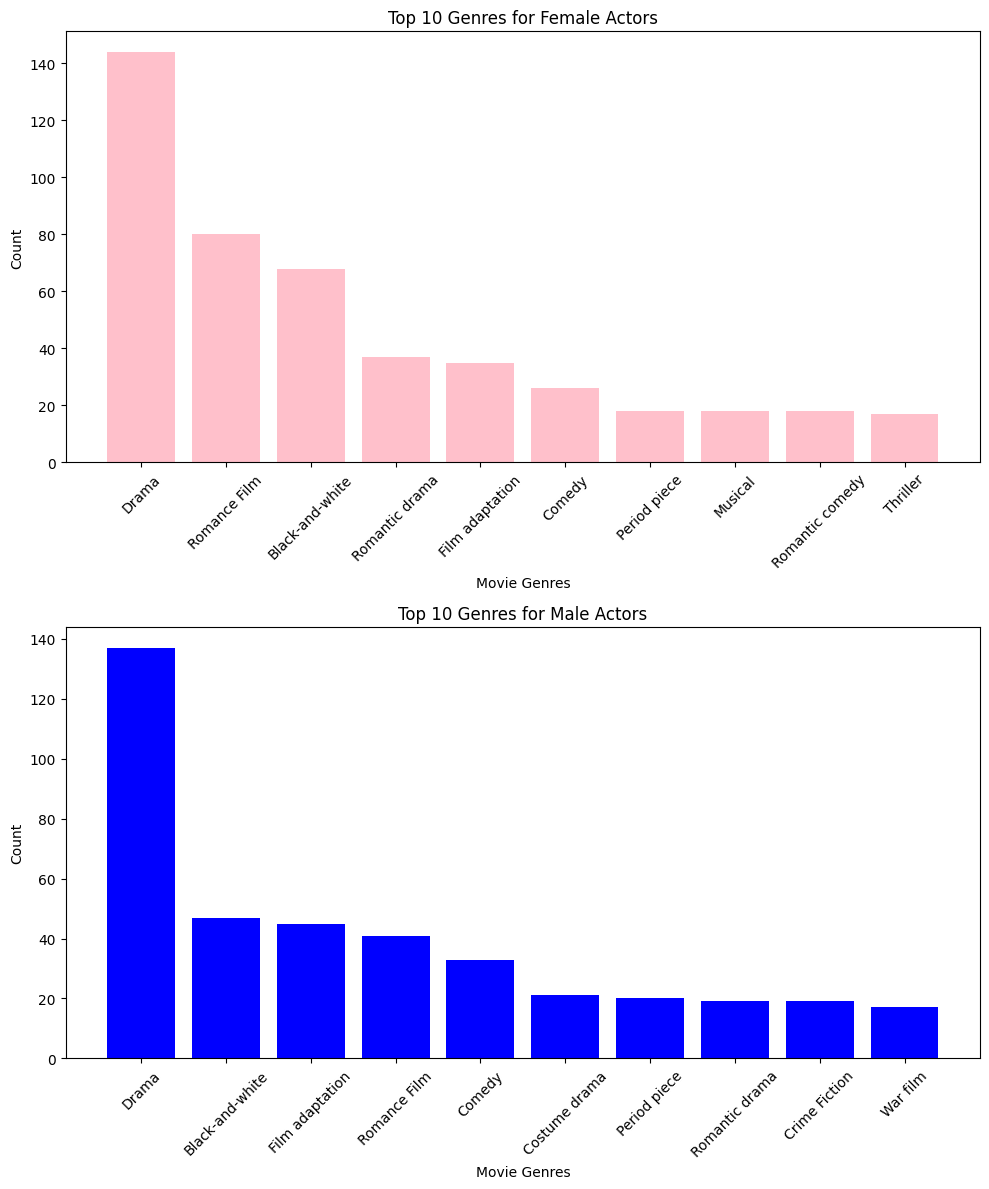

In [36]:
genre_counts = df_exploded.groupby(['Actor gender', 'Movie genres']).size().unstack(fill_value=0)

# Sum the genre counts for each gender and sort in descending order
female_counts = genre_counts.loc['F'].sort_values(ascending=False)
male_counts = genre_counts.loc['M'].sort_values(ascending=False)

# Select the top 10 genres for each gender
top_female_genres = female_counts.head(10)
top_male_genres = male_counts.head(10)

# Create bar charts for the top 10 genres for Female and Male actors
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot for Female actors
ax1.bar(top_female_genres.index, top_female_genres, color='pink')
ax1.set_xlabel('Movie Genres')
ax1.set_ylabel('Count')
ax1.set_title('Top 10 Genres for Female Actors')
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels


# Plot for Male actors
ax2.bar(top_male_genres.index, top_male_genres, color='blue')
ax2.set_xlabel('Movie Genres')
ax2.set_ylabel('Count')
ax2.set_title('Top 10 Genres for Male Actors')
ax2.tick_params(axis='x', rotation=45)  # Rotate x-axis labels


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

**Observation** Based on top 10 genres that the actors got nomination from, it is seen that there are some overlaps in genre choices between female and male actors, however, there are some specific distinctions like romantic drama for females and war film for males.

**Hypothesis Testing - Age at First Nomination/Win**

In [37]:
# Assuming 'df' is your DataFrame

columns_of_interest = ['Actor date of birth', 'Actor gender', 'Oscar Status', 'year_ceremony', 'Actor name'] #already not nominated discarded in nominated_merged_oscars_character
df_subset = nominated_merged_oscars_character[columns_of_interest]

df_subset['Actor date of birth'] = pd.to_datetime(df_subset['Actor date of birth'])
df_subset['year_ceremony'] = pd.to_datetime(df_subset['year_ceremony'], format='%Y').dt.year

# Calculate age at the time of the ceremony
df_subset['Age at Nomination/Win'] = df_subset['year_ceremony'] - df_subset['Actor date of birth'].dt.year

# Filter for first nominations/wins
df_first_nomination = df_subset.sort_values(by=['Actor name', 'year_ceremony']).drop_duplicates(subset=['Actor name'])

# Group by gender and calculate average age
avg_age_by_gender = df_first_nomination.groupby('Actor gender')['Age at Nomination/Win'].mean()

# Perform T-test
t_stat, p_value = stats.ttest_ind(
    df_first_nomination[df_first_nomination['Actor gender'] == 'M']['Age at Nomination/Win'],
    df_first_nomination[df_first_nomination['Actor gender'] == 'F']['Age at Nomination/Win'],
    equal_var=False
)

# Interpret results
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 4.902699583208093, P-value: 2.9554973762104967e-06


In [38]:
avg_age_by_gender

Actor gender
F    31.170732
M    36.507246
Name: Age at Nomination/Win, dtype: float64

**Observation** The p value less than 0.05 shows that we reject the null hypothesis. The positive t-value shows that male actors tend to be older than female actors at the time of their first Oscar nomination or win.

Note that although the test indicates a significant difference, it does not explain the reasons/ causality behind this difference.


**Analysis about the Impact of Gender Composition in Cast and Crew on IMDb Ratings**

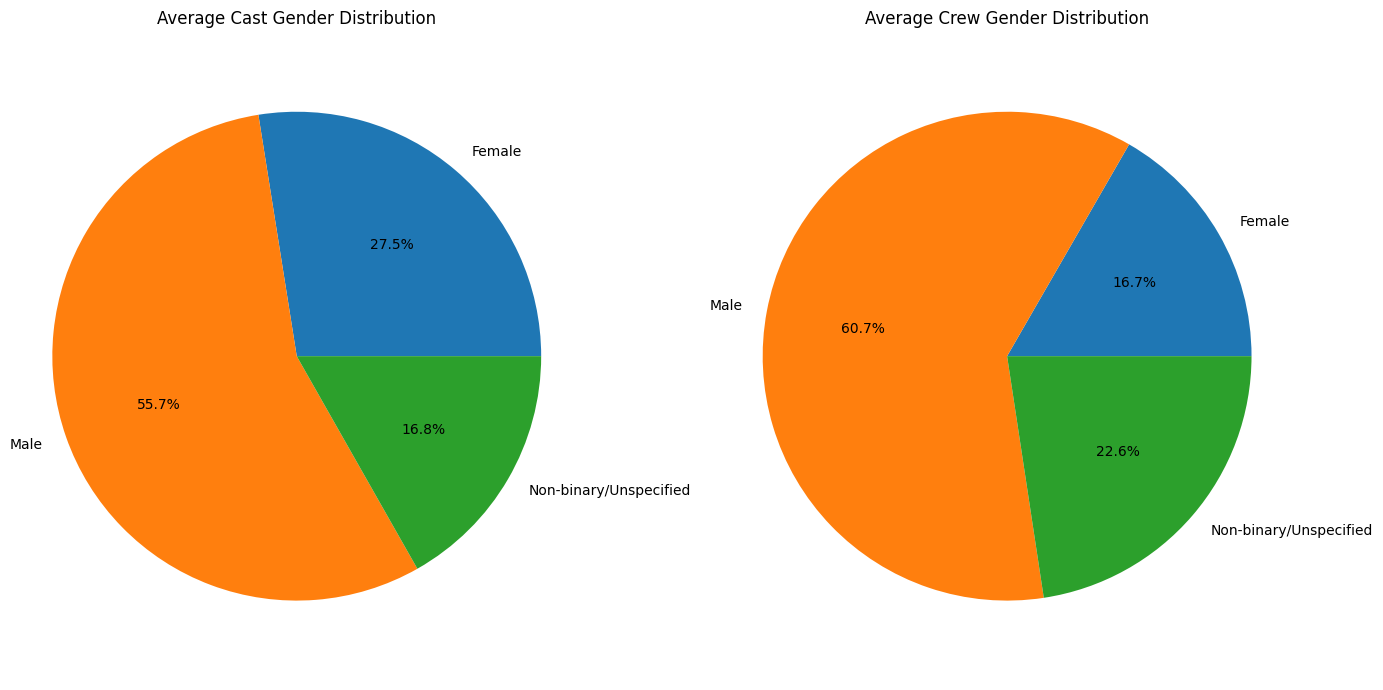

In [81]:
def str_to_dict(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return {}
    
movie_with_gender_info['cast_gender_percentages'] = movie_with_gender_info['cast_gender_percentages'].apply(str_to_dict)
movie_with_gender_info['crew_gender_percentages'] = movie_with_gender_info['crew_gender_percentages'].apply(str_to_dict)

mean_cast_gender = movie_with_gender_info['cast_gender_percentages'].apply(pd.Series).mean()
mean_crew_gender = movie_with_gender_info['crew_gender_percentages'].apply(pd.Series).mean()

cast_sizes = [mean_cast_gender.get(1, 0), mean_cast_gender.get(2, 0), 100 - (mean_cast_gender.get(1, 0) + mean_cast_gender.get(2, 0))]
crew_sizes = [mean_crew_gender.get(1, 0), mean_crew_gender.get(2, 0), 100 - (mean_crew_gender.get(1, 0) + mean_crew_gender.get(2, 0))]
labels = ['Female', 'Male', 'Non-binary/Unspecified']

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].pie(cast_sizes, labels=labels, autopct='%1.1f%%')
ax[0].set_title('Average Cast Gender Distribution')
ax[0].axis('equal') 

ax[1].pie(crew_sizes, labels=labels, autopct='%1.1f%%')
ax[1].set_title('Average Crew Gender Distribution')
ax[1].axis('equal')  

plt.tight_layout()
plt.show()

In [187]:
import pandas as pd
# Read the TSV file into a DataFrame
df_imdb = pd.read_csv('./additional_dataset/data.tsv', delimiter='\t')
df_imdb_title = pd.read_csv('./additional_dataset/title_data.tsv', delimiter='\t')


C:\Users\zeyne\AppData\Local\Temp\ipykernel_22732\88434223.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_imdb_title = pd.read_csv('./additional_dataset/title_data.tsv', delimiter='\t')


In [188]:
df_imdb_info = df_imdb.merge(df_imdb_title, on='tconst', how='inner')

In [189]:
df_imdb_info.head(2)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,2008,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,5.8,270,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"


In [190]:
df_imdb_info.drop_duplicates(subset=['originalTitle'], inplace=True)

In [191]:
merged_movie_info = pd.merge(movie_df, df_imdb_info, right_on=df_imdb_info['originalTitle'].str.lower(), left_on=movie_df['Movie name'].str.lower(), how='inner')

In [192]:
len(merged_movie_info)

57014

In [193]:
merged_movie_info["averageRating"].isnull().sum()

0

In [194]:
merged_movie_info=merged_movie_info[['Movie name', 'averageRating']]
# Convert 'Movie name' column in both DataFrames to lowercase
merged_movie_info['Movie name'] = merged_movie_info['Movie name'].str.lower()
movie_with_gender_info['title'] = movie_with_gender_info['title'].str.lower()

cast_crew_wt_ratings= merged_movie_info.merge(movie_with_gender_info, left_on='Movie name', right_on='title', how='inner')

# Drop the duplicate 'title' column
cast_crew_wt_ratings = cast_crew_wt_ratings.drop(columns='title')
cast_crew_wt_ratings.head(2)

,Movie name,averageRating,cast,crew,cast_gender,crew_gender,combined_genders,all_gender_percentages,cast_gender_percentages,crew_gender_percentages
0,ghosts of mars,4.9,"[{'adult': False, 'gender': 1, 'id': 57395, 'k...","[{'adult': False, 'gender': 2, 'id': 8340, 'kn...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","[2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, ...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","{1: 38.46153846153847, 2: 47.43589743589743, 0...","{1: 40.74074074074074, 2: 55.55555555555556, 0...","{2: 43.13725490196079, 0: 19.607843137254903, ..."
1,white of the eye,6.1,"[{'adult': False, 'gender': 2, 'id': 18181, 'k...","[{'adult': False, 'gender': 2, 'id': 3181, 'kn...","[2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1]","[2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, ...","[2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, ...","{2: 52.94117647058824, 1: 20.588235294117645, ...","{2: 40.0, 1: 33.33333333333333, 0: 26.66666666...","{2: 63.1578947368421, 1: 10.526315789473683, 0..."


In [195]:
import ast
import statsmodels.api as sm


# Function to extract percentage for a specific gender
def get_gender_percentage(gender_dict, gender_key):
    return gender_dict.get(gender_key, 0)

# Extracting gender percentages for cast and crew
cast_crew_wt_ratings['male_cast_percentage'] = cast_crew_wt_ratings['cast_gender_percentages'].apply(lambda x: get_gender_percentage(x, 2))  # 2 for male
cast_crew_wt_ratings['female_cast_percentage'] = cast_crew_wt_ratings['cast_gender_percentages'].apply(lambda x: get_gender_percentage(x, 1))  # 1 for female
cast_crew_wt_ratings['nonbinary_cast_percentage'] = cast_crew_wt_ratings['cast_gender_percentages'].apply(lambda x: get_gender_percentage(x, 0))  # 0 for non-binary/unspecified

cast_crew_wt_ratings['male_crew_percentage'] = cast_crew_wt_ratings['crew_gender_percentages'].apply(lambda x: get_gender_percentage(x, 2))  # Similarly for crew
cast_crew_wt_ratings['female_crew_percentage'] = cast_crew_wt_ratings['crew_gender_percentages'].apply(lambda x: get_gender_percentage(x, 1))
cast_crew_wt_ratings['nonbinary_crew_percentage'] = cast_crew_wt_ratings['crew_gender_percentages'].apply(lambda x: get_gender_percentage(x, 0))


In [196]:
cast_crew_wt_ratings.head(2)

,Movie name,averageRating,cast,crew,cast_gender,crew_gender,combined_genders,all_gender_percentages,cast_gender_percentages,crew_gender_percentages,male_cast_percentage,female_cast_percentage,nonbinary_cast_percentage,male_crew_percentage,female_crew_percentage,nonbinary_crew_percentage
0,ghosts of mars,4.9,"[{'adult': False, 'gender': 1, 'id': 57395, 'k...","[{'adult': False, 'gender': 2, 'id': 8340, 'kn...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","[2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, ...","[1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, ...","{1: 38.46153846153847, 2: 47.43589743589743, 0...","{1: 40.74074074074074, 2: 55.55555555555556, 0...","{2: 43.13725490196079, 0: 19.607843137254903, ...",55.555556,40.740741,3.703704,43.137255,37.254902,19.607843
1,white of the eye,6.1,"[{'adult': False, 'gender': 2, 'id': 18181, 'k...","[{'adult': False, 'gender': 2, 'id': 3181, 'kn...","[2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1]","[2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, ...","[2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, ...","{2: 52.94117647058824, 1: 20.588235294117645, ...","{2: 40.0, 1: 33.33333333333333, 0: 26.66666666...","{2: 63.1578947368421, 1: 10.526315789473683, 0...",40.000000,33.333333,26.666667,63.157895,10.526316,26.315789


In [197]:
cast_crew_wt_ratings['Movie name'] = cast_crew_wt_ratings['Movie name'].str.lower()
movie_df['Movie name'] = movie_df['Movie name'].str.lower()

# Merge based on the lowercase 'Movie name' column
merged_data = pd.merge(cast_crew_wt_ratings, movie_df, on='Movie name', how='inner')
merged_data=merged_data[["Movie name", "Movie release year","Movie genres", "Movie languages","averageRating",
       'male_cast_percentage', 'female_cast_percentage',
       'nonbinary_cast_percentage', 'male_crew_percentage',
       'female_crew_percentage', 'nonbinary_crew_percentage', 'Year Interval' ]]

In [198]:
merged_data.head(2)

,Movie name,Movie release year,Movie genres,Movie languages,averageRating,male_cast_percentage,female_cast_percentage,nonbinary_cast_percentage,male_crew_percentage,female_crew_percentage,nonbinary_crew_percentage,Year Interval
0,ghosts of mars,2001,"[Thriller, Science Fiction, Horror, Adventure,...",[English Language],4.9,55.555556,40.740741,3.703704,43.137255,37.254902,19.607843,2000-2005
1,white of the eye,1987,"[Thriller, Erotic thriller, Psychological thri...",[English Language],6.1,40.000000,33.333333,26.666667,63.157895,10.526316,26.315789,1985-1990


Correlation Analysis based on gender distribution in Cast & Crew and IMDB ratings

In [241]:
gender_columns = ["male_cast_percentage", "female_cast_percentage", "nonbinary_cast_percentage", 
                  "male_crew_percentage", "female_crew_percentage", "nonbinary_crew_percentage", 
                  "averageRating"]
corr_data = merged_data[gender_columns]

correlations = corr_data.corr()['averageRating'].drop('averageRating')
print(correlations)

male_cast_percentage         0.001782
female_cast_percentage      -0.008818
nonbinary_cast_percentage   -0.003767
male_crew_percentage         0.013692
female_crew_percentage       0.028989
nonbinary_crew_percentage   -0.020391
Name: averageRating, dtype: float64


Group Comparisons

male-dominated, female-dominated, balanced movies and compare their average ratings.

In [230]:
from scipy.stats import f_oneway

# Categorizing films based on gender composition of cast
# For simplicity, using basic categorization: male-dominated, female-dominated, balanced
conditions = [
    (merged_data['male_cast_percentage'] > merged_data['female_cast_percentage'] + merged_data['nonbinary_cast_percentage']),
    (merged_data['female_cast_percentage'] > merged_data['male_cast_percentage'] + merged_data['nonbinary_cast_percentage'])
]
choices = ['male-dominated', 'female-dominated']
merged_data['cast_category'] = np.select(conditions, choices, default='balanced')

# Performing ANOVA (Analysis of Variance) to test if there are statistically significant differences 
# in average IMDb ratings among the different categories
anova_groups = merged_data.groupby('cast_category')['averageRating'].apply(list)

# Conducting the ANOVA test
f_statistic, p_value = f_oneway(*anova_groups)

# Hypothesis Testing Results
f_statistic, p_value

(5.9137486244668125, 0.002702755255529064)

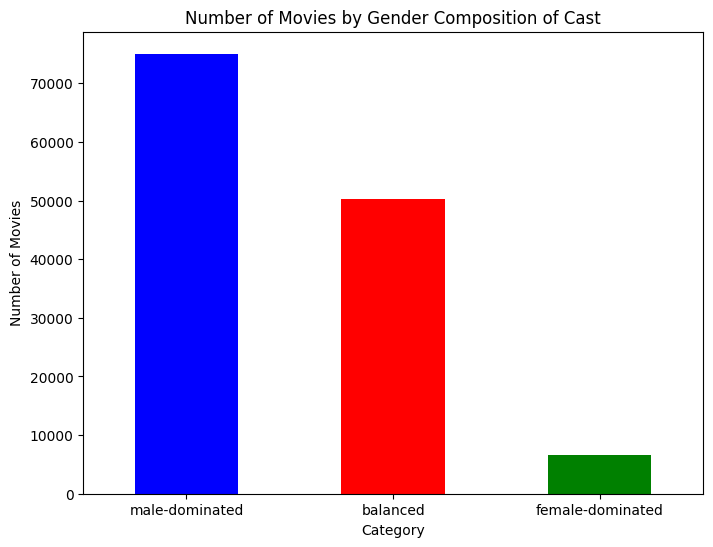

In [231]:
import matplotlib.pyplot as plt

# Count the number of movies in each category
category_counts = merged_data['cast_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Number of Movies by Gender Composition of Cast')
plt.xlabel('Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


**Observation** High F-statistics shows that there is a difference in variances between the groups. When we examined p value in this case, it suggests that  the IMDb ratings are significantly different among films based on the cast gender distribution. It can be considered as an indicator that shows the gender composition of the cast might have an influence over the ratings. However, this might be due to the unequal distribution of classes in the original dataset that we are using.

In [232]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene
male_dominated_ratings = merged_data[merged_data['cast_category'] == 'male-dominated']['averageRating']
female_dominated_ratings = merged_data[merged_data['cast_category'] == 'female-dominated']['averageRating']

# Check for Normality
shapiro_male = shapiro(male_dominated_ratings)
shapiro_female = shapiro(female_dominated_ratings)

# Check for Equal Variances
levene_test = levene(male_dominated_ratings, female_dominated_ratings)

#If normality and equal variances are met -> use t test
#otherwise -> use Mann-Whitney U test

c:\Users\zeyne\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [233]:
test_type="Mann-Whitney U test"
if shapiro_male.pvalue > 0.05 and shapiro_female.pvalue > 0.05 and levene_test.pvalue > 0.05:
    test_type = "T-Test"
print(test_type)

Mann-Whitney U test


In [234]:
test_result = mannwhitneyu(male_dominated_ratings, female_dominated_ratings)
print(test_result)

MannwhitneyuResult(statistic=234986972.5, pvalue=1.555307159975657e-11)


**Observation** The p value is much lower than the threshold, so we can conclude that there is a statistically significant difference in the differences in average IMDb ratings between male-dominated and female-dominated films. To make further analysis, we will look at the descriptive statistics of male dominant and female dominant movie ratings. Again, we should note that the unequal sample sizes of each group might show the statistically significant condition.

In [235]:
# Calculate various statistics for male-dominated and female-dominated ratings
mean_male_dominated = np.mean(male_dominated_ratings)
std_male_dominated = np.std(male_dominated_ratings)
iqr_male_dominated = np.percentile(male_dominated_ratings, 75) - np.percentile(male_dominated_ratings, 25)
min_male_dominated = np.min(male_dominated_ratings)
max_male_dominated = np.max(male_dominated_ratings)

mean_female_dominated = np.mean(female_dominated_ratings)
std_female_dominated = np.std(female_dominated_ratings)
iqr_female_dominated = np.percentile(female_dominated_ratings, 75) - np.percentile(female_dominated_ratings, 25)
min_female_dominated = np.min(female_dominated_ratings)
max_female_dominated = np.max(female_dominated_ratings)

# Display the calculated statistics
print("Statistics for Male-Dominant Films:")
print("Mean IMDb rating:", mean_male_dominated)
print("Standard Deviation:", std_male_dominated)
print("Interquartile Range (IQR):", iqr_male_dominated)
print("Minimum IMDb rating:", min_male_dominated)
print("Maximum IMDb rating:", max_male_dominated)

print("\nStatistics for Female-Dominant Films:")
print("Mean IMDb rating:", mean_female_dominated)
print("Standard Deviation:", std_female_dominated)
print("Interquartile Range (IQR):", iqr_female_dominated)
print("Minimum IMDb rating:", min_female_dominated)
print("Maximum IMDb rating:", max_female_dominated)


Statistics for Male-Dominant Films:
Mean IMDb rating: 6.270628289692851
Standard Deviation: 1.0290216002314856
Interquartile Range (IQR): 1.2000000000000002
Minimum IMDb rating: 1.3
Maximum IMDb rating: 10.0

Statistics for Female-Dominant Films:
Mean IMDb rating: 6.317627427184466
Standard Deviation: 1.1415457826170863
Interquartile Range (IQR): 1.7000000000000002
Minimum IMDb rating: 1.1
Maximum IMDb rating: 9.6


**Observation** Between the mean IMDB ratings the difference is quite small and both groups have similar standard deviation. However, the interquartile range shows that there is more variability in rating ranges within the category for female dominant films. Altough there is a statistically significant difference, this stats might suggest that there are other factors in the determination of film ratings beside gender distributions.

Apply Post-Hoc Tests

In [236]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming you have already categorized your data into cast_category
# and computed the averageRating for each group
# In this example, 'cast_category' contains the group labels, and 'averageRating' contains the ratings.

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=merged_data['averageRating'], groups=merged_data['cast_category'], alpha=0.05)

# Print the summary of the Tukey HSD test
print(tukey_results)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
        balanced female-dominated   0.0405 0.0111  0.0075  0.0734   True
        balanced   male-dominated  -0.0065 0.5407  -0.021   0.008  False
female-dominated   male-dominated   -0.047 0.0019 -0.0793 -0.0147   True
------------------------------------------------------------------------


**Observation** We used to compare the means of multiple groups after an ANOVA test has found a significant difference. The observations between groups as follows:
* There is a significant difference between the balanced and female-dominated groups, the female-dominated group has a higher mean in both comparisons.
* There is no significant difference between the balanced and male-dominated groups.

In [237]:
#Do the same thing for crew
from scipy.stats import f_oneway

# Categorizing films based on gender composition of cast
# For simplicity, using basic categorization: male-dominated, female-dominated, balanced
conditions = [
    (merged_data['male_crew_percentage'] > merged_data['female_crew_percentage'] + merged_data['nonbinary_crew_percentage']),
    (merged_data['female_crew_percentage'] > merged_data['male_crew_percentage'] + merged_data['nonbinary_crew_percentage'])
]
choices = ['male-dominated', 'female-dominated']
merged_data['crew_category'] = np.select(conditions, choices, default='balanced')

# Performing ANOVA (Analysis of Variance) to test if there are statistically significant differences 
anova_groups = merged_data.groupby('crew_category')['averageRating'].apply(list)

# Conducting the ANOVA test
f_statistic, p_value = f_oneway(*anova_groups)

# Hypothesis Testing Results
f_statistic, p_value

(109.54898148483908, 2.903641869662533e-48)

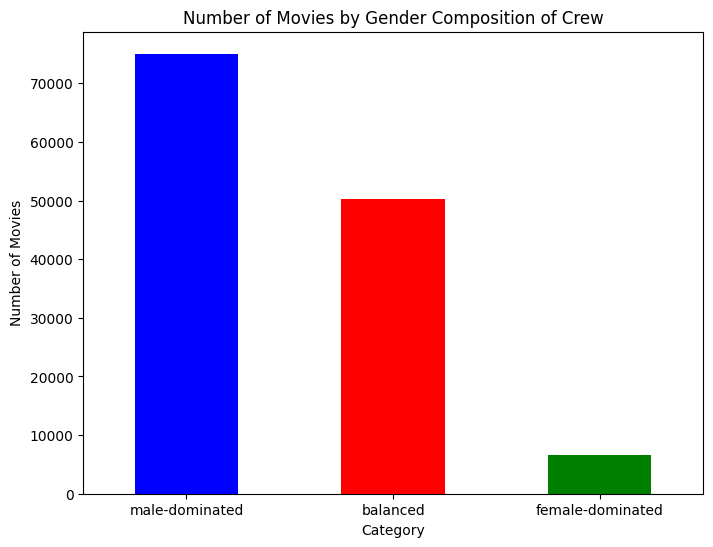

In [238]:

# Count the number of movies in each category
crew_counts = merged_data['crew_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Number of Movies by Gender Composition of Crew')
plt.xlabel('Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


**Observation** The same situation applies to crew situation as well. The amount of samples are unequally distributed. So, although the result of p value shows that there is a significant difference it might be the result of this unequalness.

Changes in time based on cast and crew distributions

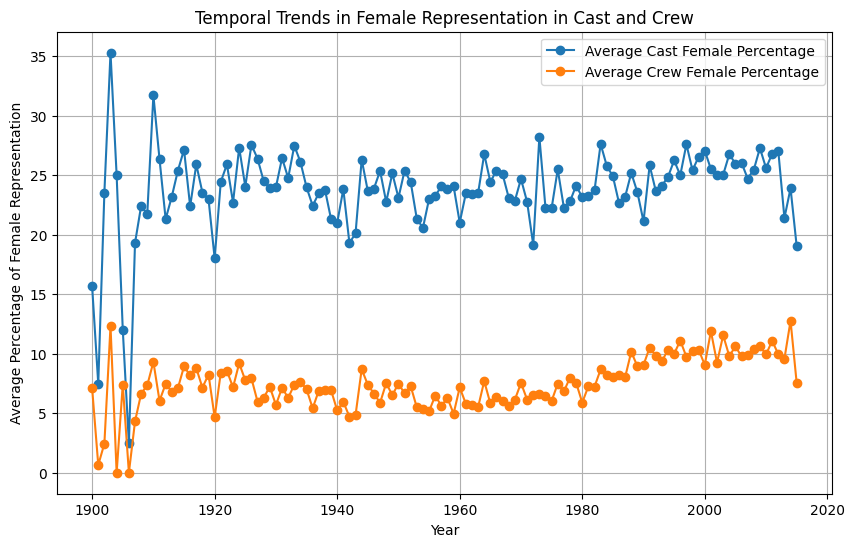

In [250]:
# Plotting temporal trends
filtered_df = merged_data[(merged_data["Movie release year"] >= 1900) & (merged_data["Movie release year"] <= 2015)]

average_cast_female_per_year = filtered_df.groupby('Movie release year')['female_cast_percentage'].mean()
average_crew_female_per_year = filtered_df.groupby('Movie release year')['female_crew_percentage'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_cast_female_per_year, label="Average Cast Female Percentage", marker='o')
plt.plot(average_crew_female_per_year, label="Average Crew Female Percentage", marker='o')
plt.xlabel("Year")
plt.ylabel("Average Percentage of Female Representation")
plt.title("Temporal Trends in Female Representation in Cast and Crew")
plt.legend()
plt.grid(True)
plt.show()

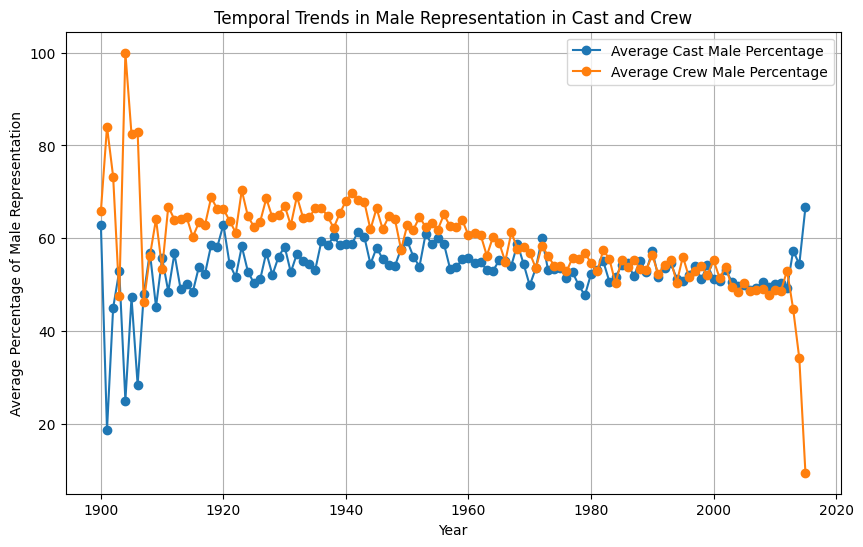

In [249]:
average_cast_male_per_year = filtered_df.groupby('Movie release year')['male_cast_percentage'].mean()
average_crew_male_per_year = filtered_df.groupby('Movie release year')['male_crew_percentage'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_cast_male_per_year, label="Average Cast Male Percentage", marker='o')
plt.plot(average_crew_male_per_year, label="Average Crew Male Percentage", marker='o')
plt.xlabel("Year")
plt.ylabel("Average Percentage of Male Representation")
plt.title("Temporal Trends in Male Representation in Cast and Crew")
plt.legend()
plt.grid(True)
plt.show()

**Observation** 
Both graphs point to gender inequality in the film industry; It seems that there are more men than women in both the cast and the crew. The data shows that there have been some efforts towards gender balance over time, but there is a notable gap between the representation of men and women.

In [251]:
merged_for_genre = pd.merge(
    movie_df,
    character_df,
    on=['Wikipedia movie ID', 'Freebase movie ID'],
    how='left',  
    suffixes=('_movie', '_character')  
)


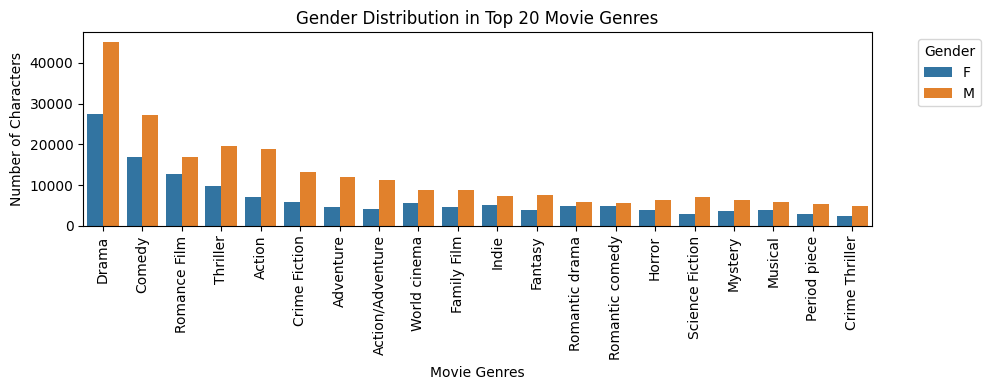

In [259]:
merged_for_genre['Movie genres'] = merged_for_genre['Movie genres'].apply(lambda x: x if isinstance(x, list) else [])
genre_gender_df = merged_for_genre.explode('Movie genres')
genre_gender_distribution = genre_gender_df.groupby(['Movie genres', 'Actor gender']).size().unstack().fillna(0)

top_n = 20
top_genres = genre_gender_distribution.sum(axis=1).nlargest(top_n).index

top_genre_gender_distribution = genre_gender_distribution.loc[top_genres]

top_genre_gender_distribution = top_genre_gender_distribution.stack().reset_index()
top_genre_gender_distribution.columns = ['Movie genres', 'Actor gender', 'Number of Characters']

plt.figure(figsize=(10, 4))
sns.barplot(x='Movie genres', y='Number of Characters', hue='Actor gender', data=top_genre_gender_distribution)
plt.title('Gender Distribution in Top 20 Movie Genres')
plt.xlabel('Movie Genres')
plt.ylabel('Number of Characters')
plt.xticks(rotation=90)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



**Observation** At this stage, we aim to see the female and male characters distribution based on the genres. But since there are a variety of genres, we targeted the first 20 genres. It is obvious that for the top 20 genres, the amount of the male characters exceeeds the female characters. But this fact causes us to think whether we really have some genres that the number of females are equal or more than the male characters or not. Let's search for it.

Genres that has more female characters than male characters

In [256]:
equal_or_more_female_genres = genre_gender_distribution[genre_gender_distribution["F"] > genre_gender_distribution["M"]]
print(equal_or_more_female_genres)


Actor gender                         F      M
Movie genres                                 
Adult                            107.0   97.0
Anthology                         25.0   20.0
Backstage Musical                 11.0    5.0
Breakdance                         1.0    0.0
Children's Entertainment          16.0   14.0
Coming-of-age film                12.0   11.0
Family & Personal Relationships    1.0    0.0
Feminist Film                    221.0  168.0
Filipino                           2.0    0.0
Filmed Play                        1.0    0.0
Health & Fitness                   1.0    0.0
Libraries and librarians           7.0    6.0
Mumblecore                        15.0   12.0
Operetta                           2.0    0.0
Patriotic film                     1.0    0.0
Pornographic movie                79.0   52.0
Pornography                        3.0    0.0
Pre-Code                         107.0   60.0
Psycho-biddy                      21.0   12.0
Roadshow/Carny                    

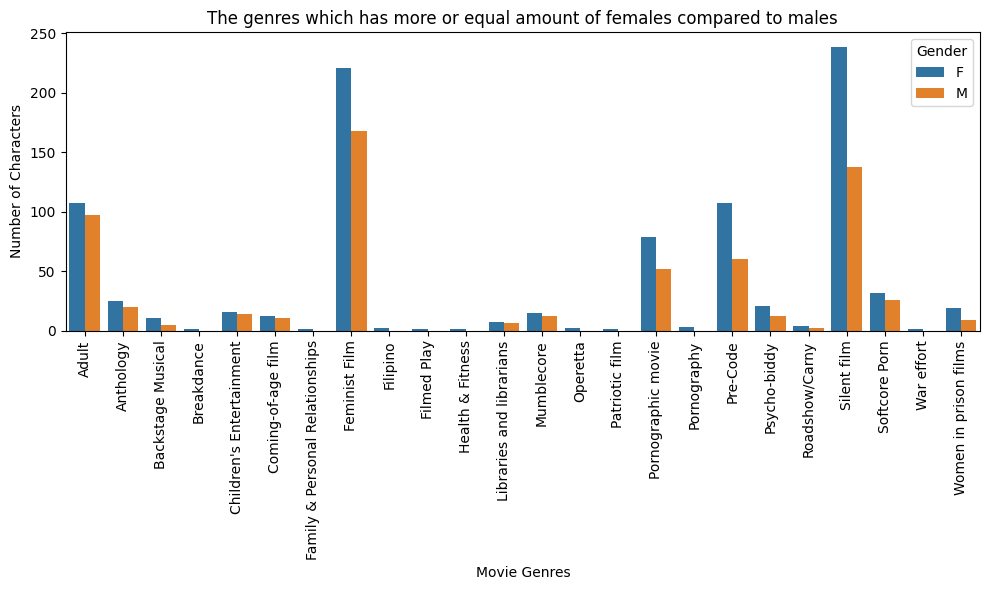

In [257]:
plot_data = equal_or_more_female_genres.reset_index()
plot_data = plot_data.melt(id_vars='Movie genres', var_name='Gender', value_name='Number of Characters')

plt.figure(figsize=(10, 6))
sns.barplot(x='Movie genres', y='Number of Characters', hue='Gender', data=plot_data)
plt.title('The genres which has more or equal amount of females compared to males')
plt.xlabel('Movie Genres')
plt.ylabel('Number of Characters')
plt.xticks(rotation=90)
plt.legend(title='Gender')

plt.tight_layout()
plt.show()